In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [3]:
data=pd.read_csv('customer.csv')
data

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1
...,...,...,...,...,...
195,CUSTID196,120000,36,79,1
196,CUSTID197,126000,46,32,1
197,CUSTID198,126000,29,72,0
198,CUSTID199,137000,32,22,0


In [5]:
data.isnull().sum()

Cust_Number         0
Yearly_Income       0
Age                 0
Cust_Spend_Score    0
Sex                 0
dtype: int64

In [7]:
data.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                  int64
dtype: object

In [9]:
data.shape

(200, 5)

In [10]:
data['Sex']=data['Sex'].astype('object')

In [11]:
data.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                 object
dtype: object

In [20]:
df_num=data.select_dtypes(np.number)

In [14]:
df_num

,Yearly_Income,Age,Cust_Spend_Score
0,15000,18,44
1,15000,18,79
2,16000,23,8
3,16000,25,79
4,17000,32,41
...,...,...,...
195,120000,36,79
196,126000,46,32
197,126000,29,72
198,137000,32,22


Yearly_Income


<IPython.core.display.Javascript object>

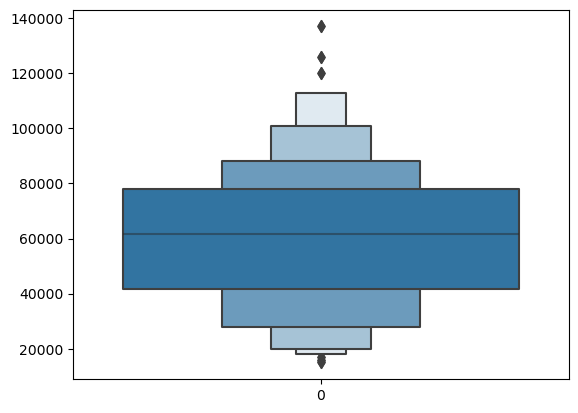

Age


<IPython.core.display.Javascript object>

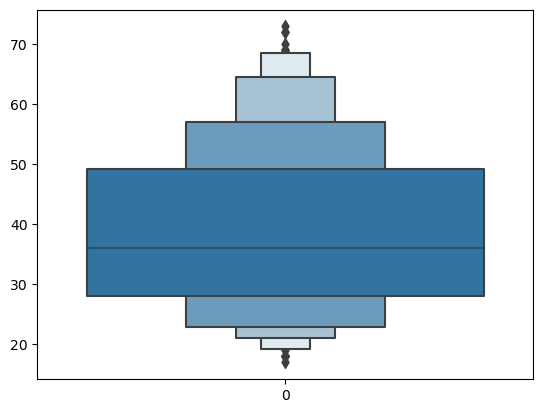

Cust_Spend_Score


<IPython.core.display.Javascript object>

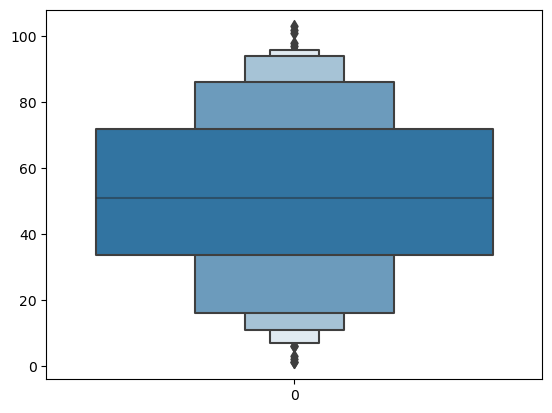

In [22]:
for i in df_num.columns:
    print(i)
    sns.boxenplot(df_num[i])
    plt.show()

In [18]:
# salary has outlayersrest fine

In [23]:
df1=df_num[df_num['Yearly_Income']<130000]

In [24]:
df1

,Yearly_Income,Age,Cust_Spend_Score
0,15000,18,44
1,15000,18,79
2,16000,23,8
3,16000,25,79
4,17000,32,41
...,...,...,...
193,113000,35,94
194,120000,48,17
195,120000,36,79
196,126000,46,32


<IPython.core.display.Javascript object>

<Axes: >

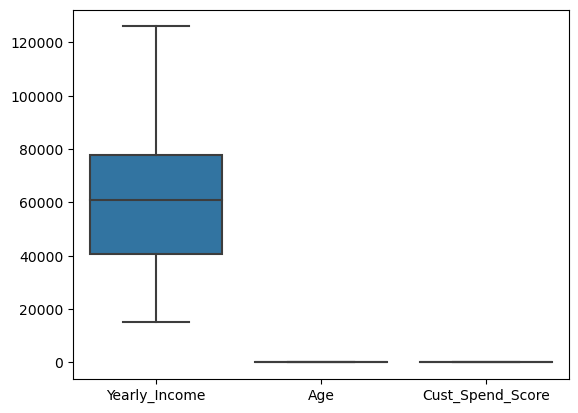

In [25]:
sns.boxplot(df1)

In [27]:
df1=df1[['Yearly_Income','Cust_Spend_Score']]

In [28]:
df1

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41
...,...,...
193,113000,94
194,120000,17
195,120000,79
196,126000,32


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(df1)

df_sc=pd.DataFrame(df_sc,columns=df1.columns)
df_sc.head()

,Yearly_Income,Cust_Spend_Score
0,-1.779171,-0.283684
1,-1.779171,1.068399
2,-1.739447,-1.674398
3,-1.739447,1.068399
4,-1.699723,-0.399577


In [31]:
from sklearn.cluster import KMeans

In [33]:
error=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit(df_sc)
    error.append(km.inertia_)
error

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

[396.0,
 264.11904162019016,
 157.01117743011798,
 107.15541991919262,
 62.11726077456708,
 53.3012589085911,
 44.65325629532576,
 36.878530824221016,
 32.18944346763813,
 29.06865983743124,
 25.500494011497373,
 23.027497307213103,
 22.053357885964978,
 19.930028083054303,
 18.5207747590701,
 16.80535696969292,
 15.515033079459684,
 14.603498982886887,
 13.12831406554846]

In [34]:
error

[396.0,
 264.11904162019016,
 157.01117743011798,
 107.15541991919262,
 62.11726077456708,
 53.3012589085911,
 44.65325629532576,
 36.878530824221016,
 32.18944346763813,
 29.06865983743124,
 25.500494011497373,
 23.027497307213103,
 22.053357885964978,
 19.930028083054303,
 18.5207747590701,
 16.80535696969292,
 15.515033079459684,
 14.603498982886887,
 13.12831406554846]

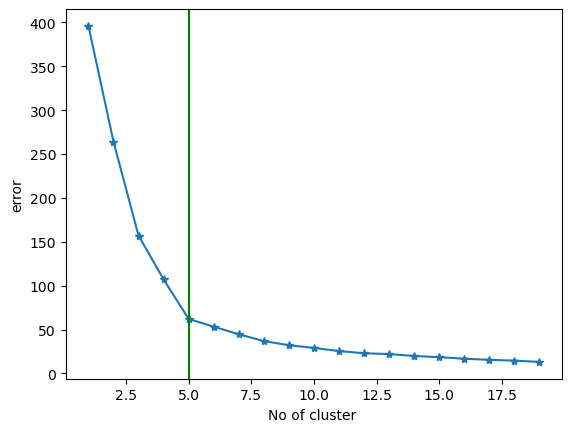

In [42]:
plt.plot(range(1,20),error,marker='*')
plt.xlabel('No of cluster ')
plt.ylabel('error')
plt.axvline(5,c='g')
plt.show()

In [43]:
# ka value will be 5 
km=KMeans(n_clusters=5)


In [44]:
km.fit(df_sc)

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [45]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1])

In [46]:
extra=pd.DataFrame(km.labels_)
df_sc['Cluster']=extra

In [47]:
df_sc

,Yearly_Income,Cust_Spend_Score,Cluster
0,-1.779171,-0.283684,4
1,-1.779171,1.068399,3
2,-1.739447,-1.674398,4
3,-1.739447,1.068399,3
4,-1.699723,-0.399577,4
...,...,...,...
193,2.113819,1.647864,1
194,2.391890,-1.326719,2
195,2.391890,1.068399,1
196,2.630236,-0.747255,2


In [49]:
cc=km.cluster_centers_

In [50]:
cc

array([[-0.20260946, -0.005541  ],
       [ 1.0098993 ,  1.23512235],
       [ 1.0379503 , -1.25267674],
       [-1.37814418,  1.16957561],
       [-1.33011303, -1.12852583]])

In [52]:
sc.inverse_transform(cc)

array([[5.46875000e+04, 5.12000000e+01],
       [8.52105263e+04, 8.33157895e+01],
       [8.59166667e+04, 1.89166667e+01],
       [2.50952381e+04, 8.16190476e+01],
       [2.63043478e+04, 2.21304348e+01]])

In [54]:
cc

array([[-0.20260946, -0.005541  ],
       [ 1.0098993 ,  1.23512235],
       [ 1.0379503 , -1.25267674],
       [-1.37814418,  1.16957561],
       [-1.33011303, -1.12852583]])

In [56]:
df_sc.drop('Cluster',axis=1,inplace=True)

In [57]:
cent1=pd.DataFrame(sc.inverse_transform(cc),columns=df_sc.columns,index=['G0','G1','G2','G3','G4'])

In [58]:
cent1

,Yearly_Income,Cust_Spend_Score
G0,54687.500000,51.200000
G1,85210.526316,83.315789
G2,85916.666667,18.916667
G3,25095.238095,81.619048
G4,26304.347826,22.130435


In [60]:
df1.head()

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41


In [61]:
df1['Label']=km.labels_
df1.head()

,Yearly_Income,Cust_Spend_Score,Label
0,15000,44,4
1,15000,79,3
2,16000,8,4
3,16000,79,3
4,17000,41,4


In [63]:
df1.Label.value_counts()

Label
0    80
1    38
2    36
4    23
3    21
Name: count, dtype: int64

In [66]:
df1.columns


Index(['Yearly_Income', 'Cust_Spend_Score', 'Label'], dtype='object')

<IPython.core.display.Javascript object>

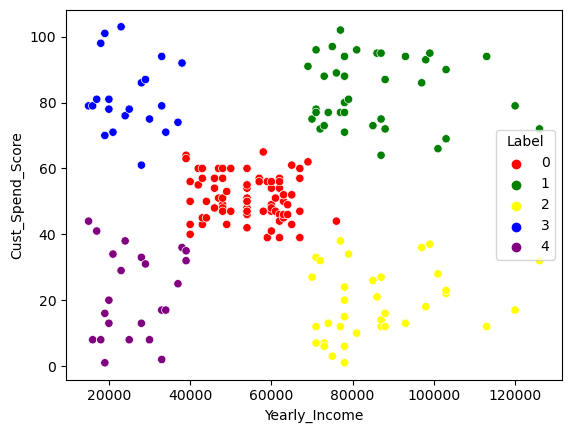

In [67]:
sns.scatterplot(x=df1['Yearly_Income'],y=df1['Cust_Spend_Score'],hue=df1['Label'],palette=['red','green','yellow','blue','purple'])
plt.show()

In [73]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

In [70]:
df_sc

,Yearly_Income,Cust_Spend_Score
0,-1.779171,-0.283684
1,-1.779171,1.068399
2,-1.739447,-1.674398
3,-1.739447,1.068399
4,-1.699723,-0.399577
...,...,...
193,2.113819,1.647864
194,2.391890,-1.326719
195,2.391890,1.068399
196,2.630236,-0.747255


In [75]:
result=[]
for i in range(2,20):
    km=KMeans(n_clusters=i)
    km.fit(df_sc)
    sil_score=silhouette_score(df_sc, km.labels_)
    result.append(sil_score)
    print('silote scorefor'," ", i,'cluster' , 'is',sil_score )
    sil_km=silhouette_visualizer(km)
    sil_km.fit(df_sc)
    plt.show()

print(result)
array=np.array(result)
dfresult=pd.DataFrame(array,columns='Sil_SCOre')

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   2 cluster is 0.3032600108408297


TypeError: silhouette_visualizer() missing 1 required positional argument: 'X'

In [76]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_sc)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_sc, labels, metric = 'euclidean'))

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

In [77]:
sil

[0.3032600108408297,
 0.464085451156394,
 0.4941073313280528,
 0.5582289588979077,
 0.5424905196078038,
 0.5269930711535271,
 0.45543289610526977,
 0.45426623046487186,
 0.448884974451782]